In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True

sb.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
records = pd.read_csv('records.csv')

In [9]:
records[['Timestamp', 'Nodes', 'Iterant', 'Relative error']]

,Timestamp,Nodes,Iterant,Relative error
0,2018-04-26 09:53:02,1.0,ajacobi,0.550931
1,2018-04-26 09:53:32,16.0,ajacobi,0.304739
2,2018-04-26 09:50:37,1.0,jacobi,0.552419
3,2018-04-26 09:52:21,16.0,jacobi,0.331765


In [10]:
df1_a = pd.read_csv('example.laplace3d_ajacobi_2018-04-26_09-53-02.csv', index_col=0)
df16_a = pd.read_csv('example.laplace3d_ajacobi_2018-04-26_09-53-32.csv', index_col=0)

df1_s = pd.read_csv('example.laplace3d_jacobi_2018-04-26_09-50-37.csv', index_col=0)
df16_s = pd.read_csv('example.laplace3d_jacobi_2018-04-26_09-52-21.csv', index_col=0)

In [11]:
toma = pd.concat([df1_a.iloc[:,0],
                  df16_a.iloc[:,0],
                  df1_s.iloc[:,0],
                  df16_s.iloc[:,0]], axis=1)
toma.columns = ['AJacobi 1', 'AJacobi 16', 'Jacobi 1', 'Jacobi 16']
toma.head()

,AJacobi 1,AJacobi 16,Jacobi 1,Jacobi 16
Time [s],,,,
0.000000,1.0,1.0,1.0,1.0
0.000004,NaN,NaN,1.0,NaN
0.000004,NaN,NaN,NaN,NaN
0.000004,NaN,NaN,NaN,NaN
0.000004,NaN,NaN,NaN,NaN


# Convergence

Text(0,0.5,'Relative error')

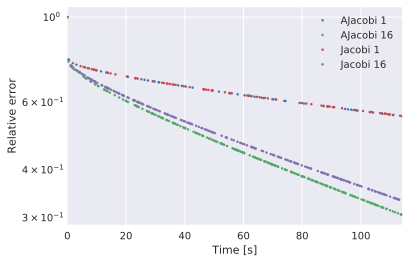

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
toma.iloc[::20].plot(ax=ax, logy=True, ms=5, style=['.', '.', '.', '.', '.', '.'])
ax.set_ylabel('Relative error')

# fig.savefig('toma.png', dpi=300)

# Observations

Synchronous and asynchronous Jacobi seem to have the same performance for $1$ node. That strongly suggests that the behaviour observed at smaller domains ($100^3$) might be due to errors in analysis or due to cache effects. A rerun is necessary.

On $16$ nodes, asynchronous Jacobi beats synchronous Jacobi with non-blocking based asychronous SPMV